In [2]:
import pandas as pd

data = pd.read_csv("final_data_to_train.csv")
filtered_data_id1 = data[data['sourceId'] == 1]

filtered_data_id1.head()

,meterId,sourceId,totalVehicles,provinceId,municipalityId,latitude,longitude,year,month,day,hour,minute
0,123,1,166,48,11,43.1954,-2.8954,2022,5,10,17,30
1,118,1,160,48,11,43.1954,-2.8954,2022,5,10,18,0
2,119,1,242,48,11,43.1954,-2.8954,2022,5,10,18,0
3,120,1,94,48,11,43.1954,-2.8954,2022,5,10,18,0
4,122,1,419,48,11,43.1954,-2.8954,2022,5,10,18,0


In [2]:
print("Number of rows data:", data.shape[0])
print("Number of rows filtered:", filtered_data_id1.shape[0])

Number of rows data: 16028750
Number of rows filtered: 1433928


In [3]:
filtered_data_id1 = filtered_data_id1.dropna()

In [4]:
print("Number of rows filtered:", filtered_data_id1.shape[0])

Number of rows filtered: 1432952


In [5]:
counts = filtered_data_id1['provinceId'].value_counts()
print(counts)

provinceId
 1     574773
 48    539123
 20    289820
-1      29236
Name: count, dtype: int64


In [6]:
rows_with_province_id_1 = filtered_data_id1[filtered_data_id1['provinceId'] == -1]
print(rows_with_province_id_1)


         meterId  sourceId  totalVehicles  provinceId  municipalityId   
2287         328         1              1          -1              -1  \
2288         327         1             26          -1              -1   
2289         328         1              3          -1              -1   
2290         327         1             27          -1              -1   
2291         328         1              2          -1              -1   
...          ...       ...            ...         ...             ...   
1407044      328         1             57          -1              -1   
1407045      327         1            185          -1              -1   
1407046      328         1             51          -1              -1   
1407047      327         1            189          -1              -1   
1407048      328         1             48          -1              -1   

         latitude  longitude  year  month  day  hour  minute  
2287      42.9412    -2.2249  2022      5   15     5      30

In [4]:
filtered_data_id1 = filtered_data_id1.reset_index(drop=True)
filtered_data_id1 = filtered_data_id1[data['provinceId'] != -1]
filtered_data_id1.head()

/var/folders/gh/yt97y6vj0_79f2lwfvsdnjpw0000gn/T/ipykernel_31916/3459284140.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data_id1 = filtered_data_id1[data['provinceId'] != -1]


,meterId,sourceId,totalVehicles,provinceId,municipalityId,latitude,longitude,year,month,day,hour,minute
0,123,1,166,48,11,43.1954,-2.8954,2022,5,10,17,30
1,118,1,160,48,11,43.1954,-2.8954,2022,5,10,18,0
2,119,1,242,48,11,43.1954,-2.8954,2022,5,10,18,0
3,120,1,94,48,11,43.1954,-2.8954,2022,5,10,18,0
4,122,1,419,48,11,43.1954,-2.8954,2022,5,10,18,0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import xgboost as xgb

X = filtered_data_id1.drop(columns=['sourceId', 'totalVehicles','minute', 'municipalityId'])

y = filtered_data_id1['totalVehicles']

numerical_vars = ['meterId','provinceId','latitude','longitude','year','month','day', 'hour']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers = [('num', StandardScaler(), numerical_vars)]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(learning_rate=0.4, max_depth=5, n_estimators=800))
])
print("done")

done


In [60]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'regressor__learning_rate': [0.35, 0.4, 0.45],   # Example learning rate values
    'regressor__max_depth': [4,6,5], # Example max depth values
    'regressor__n_estimators': [750, 800, 700],        # Example number of estimators values
    'regressor__reg_alpha': [0.1, 0.01, 0.2],    # Example reg_alpha values
    'regressor__reg_lambda': [0.4, 0.5, 0.6]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', verbose=3)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Fitting 2 folds for each of 243 candidates, totalling 486 fits
[CV 1/2] END regressor__learning_rate=0.35, regressor__max_depth=4, regressor__n_estimators=750, regressor__reg_alpha=0.1, regressor__reg_lambda=0.4;, score=-8064.222 total time=  40.2s
[CV 2/2] END regressor__learning_rate=0.35, regressor__max_depth=4, regressor__n_estimators=750, regressor__reg_alpha=0.1, regressor__reg_lambda=0.4;, score=-9945.053 total time=  38.5s
[CV 1/2] END regressor__learning_rate=0.35, regressor__max_depth=4, regressor__n_estimators=750, regressor__reg_alpha=0.1, regressor__reg_lambda=0.5;, score=-8051.214 total time=  39.8s
[CV 2/2] END regressor__learning_rate=0.35, regressor__max_depth=4, regressor__n_estimators=750, regressor__reg_alpha=0.1, regressor__reg_lambda=0.5;, score=-9966.168 total time=  37.6s
[CV 1/2] END regressor__learning_rate=0.35, regressor__max_depth=4, regressor__n_estimators=750, regressor__reg_alpha=0.1, regressor__reg_lambda=0.6;, score=-8035.925 total time=  38.0s
[CV 2/2

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get the best model
pipeline.fit(X_train,y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate evaluation scores
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation scores
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 5512.727392059254
Mean Absolute Error (MAE): 32.01084412750564
R-squared Score (R2): 0.7719765052992508


s{'regressor__learning_rate': 0.4, 'regressor__max_depth': 5, 'regressor__n_estimators': 600}
Mean Squared Error (MSE): 5425.178881957048
Mean Absolute Error (MAE): 31.84385378820371
R-squared Score (R2): 0.7755977830823867

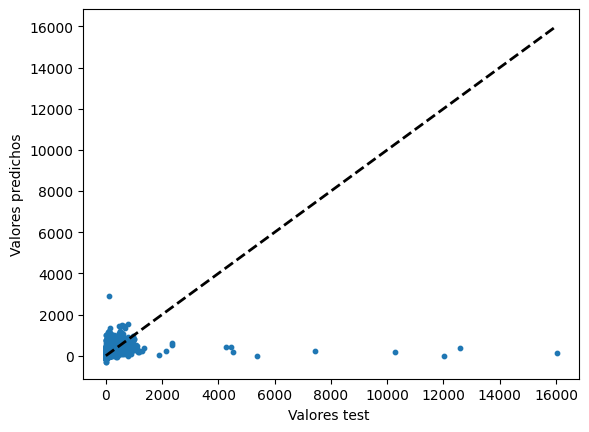

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Valores test ')
plt.ylabel('Valores predichos')
plt.show()

In [8]:
predicted_data = X_test[['meterId','latitude', 'longitude', 'month']].copy()
predicted_data['PredictedValues'] = y_pred  # Assuming y_pred contains the predicted values
predicted_data.reset_index(drop=True, inplace=True)

new_df = predicted_data.groupby('meterId').agg({'latitude': 'first', 'longitude': 'first', 'month': 'first', 'PredictedValues': 'sum'}).reset_index()
new_df.head()
new_df.dropna(inplace=True)

# Filter predicted_data for month 6
predicted_data_month6 = predicted_data[predicted_data['month'] == 6]
print(predicted_data_month6['PredictedValues'].max())
print(predicted_data_month6['PredictedValues'].min())
predicted_data_month6['PredictedValues'] = predicted_data_month6['PredictedValues'].clip(lower=1)
print(predicted_data_month6['PredictedValues'].min())

1500.511
-129.0608
1.0


/var/folders/gh/yt97y6vj0_79f2lwfvsdnjpw0000gn/T/ipykernel_31916/1514194886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_data_month6['PredictedValues'] = predicted_data_month6['PredictedValues'].clip(lower=1)


In [30]:
import plotly.graph_objects as go
from plotly.offline import plot

scaling_factor = 0.1

fig = go.Figure(go.Densitymapbox(
    lat=predicted_data_month6['latitude'],
    lon=predicted_data_month6['longitude'],
    z=predicted_data_month6['PredictedValues']*scaling_factor,
    radius=predicted_data_month6['PredictedValues']*scaling_factor+1,  # Increase the radius value to make the dots bigger
    colorscale = 'YlOrRd',
    opacity=0.75,
    showscale=False
))

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    mapbox_center={"lat": 43.1167, "lon": -2.55},
    mapbox_zoom=9.25, # Adjust the zoom level as desired

)

# Generate an HTML file with the plot
plot(fig, filename='density_map_id1_month6.html')

'density_map_id1_month6.html'

In [9]:
new_df.to_csv('predictions/predicted_data_id1_2022.csv', index=False)